In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

As we can easily observe, the dataframe contains three columns: Gender, Height, and Weight. The Gender column contains two unique values of type object: male or female. A float data type is used in the columns Height and Weight. Since the dataframe does not contain null values and the data types are the expected ones, it is not necessary to clean the data .

To better understand the distribution of the variables Height and Weight, we can simply plot both variables using histograms. 

Text(0, 0.5, 'Frequency')

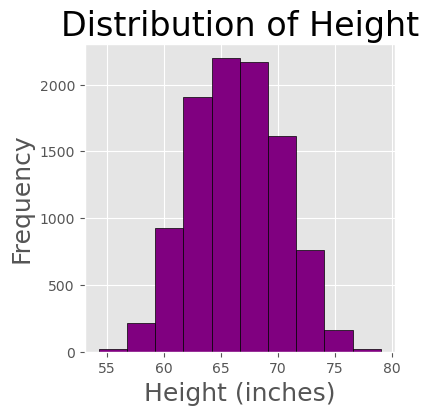

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(4,4))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

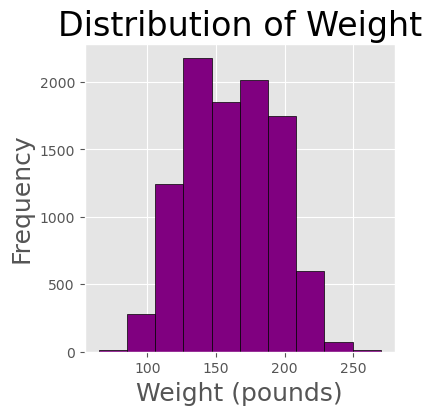

In [10]:
# histogram of the weight
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(4,4))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18)

The previous plots depict that both variables Height and Weight present a normal distribution. No lets plot the distribution of males and females in separated histograms.

Text(0, 0.5, 'Frequency')

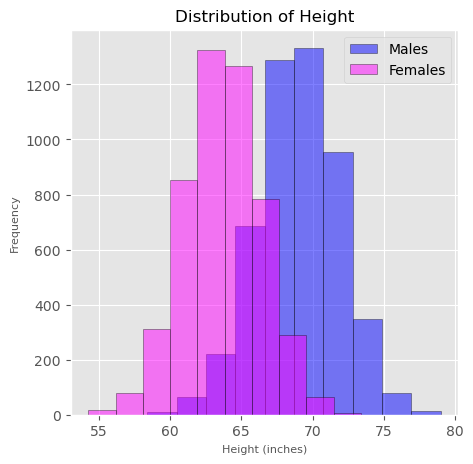

In [11]:
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(5, 5))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(5, 5))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=12)
plt.xlabel('Height (inches)', size=8)
plt.ylabel('Frequency', size=8)

Text(0, 0.5, 'Frequency')

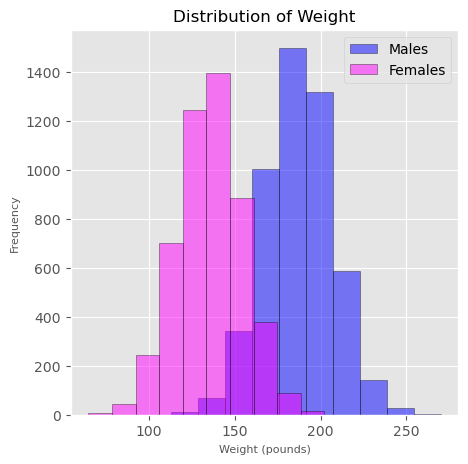

In [13]:
df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(5, 5))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(5, 5))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=12)
plt.xlabel('Weight (pounds)', size=8)
plt.ylabel('Frequency', size=8)

The previous plots show that both height and weight present a normal distribution for males and females. Although the average of both distribution is larger for males, the spread of the distributions is similar for both genders.

In [19]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns = {"Height":"Height_male","Weight":"Weight_male"}, inplace = True)
statistics_male

,Height_male,Weight_male
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989698


In [21]:
# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
# statistics_female.rename(columns=lambda x: x + '_female', inplace=True)
statistics_female.rename(columns = {"Height":"Height_female","Weight":"Weight_female"}, inplace = True)
statistics_female

,Height_female,Weight_female
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


In [22]:
# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989698,73.389586,202.237214


After performing the exploratory analysis, we can conclude that height and weight are normal distributed. Males distributions present larger average values, but the spread of distributions compared to female distributions is really similar.

Is there a relation between height and weight? Can we use the height of a person to predict his weight?

Text(0, 0.5, 'Weight (pounds)')

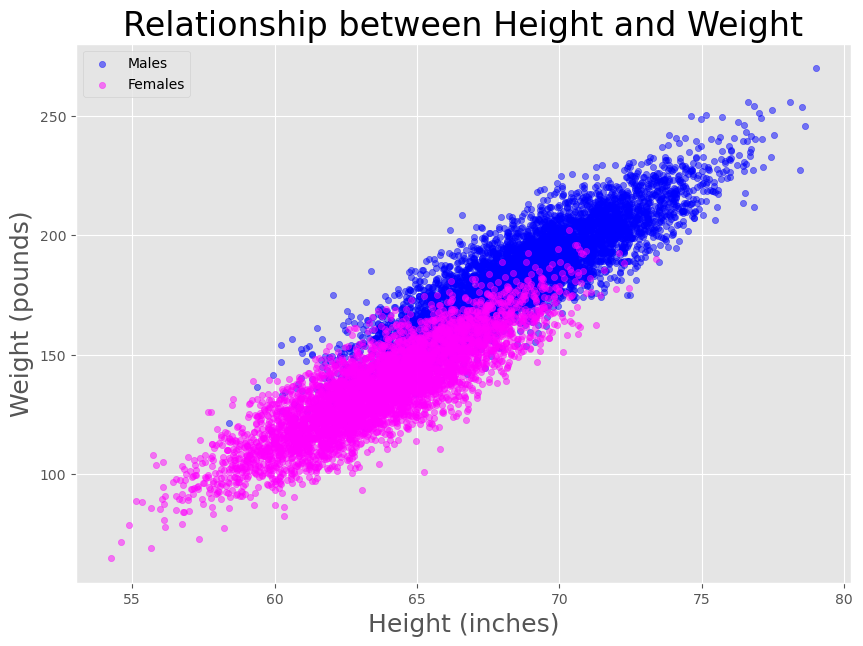

In [23]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

The following plot shows the relation between height and weight for males and females. The visualization contains 10000 observations that is why we observe overplotting. Overplotting occurs when the data overlap in a visualization, making difficult to visualize individual data points. In this case, the cause is the large number of data points (5000 males and 5000 females). Another reason can be a small number of unique values; for instance, when one of the variables of the scatter plot is a discrete variable.

To avoid this problem, we have randomly selected the height and weight of 500 women and 500 males. These plots has not overplotting and we can better distinguish individual data points. As we can observe in previous plots, weight of males and females tents to go up as height goes up, showing in both cases a linear relation.

Text(0, 0.5, 'Weight (pounds)')

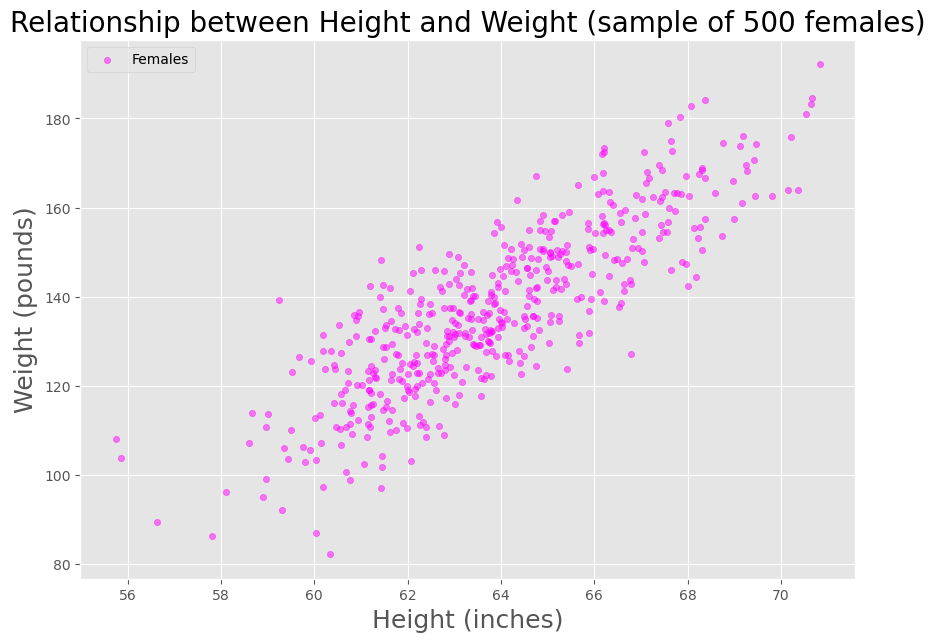

In [26]:
# Scatter plot of 500 females

sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

Text(0, 0.5, 'Weight (pounds)')

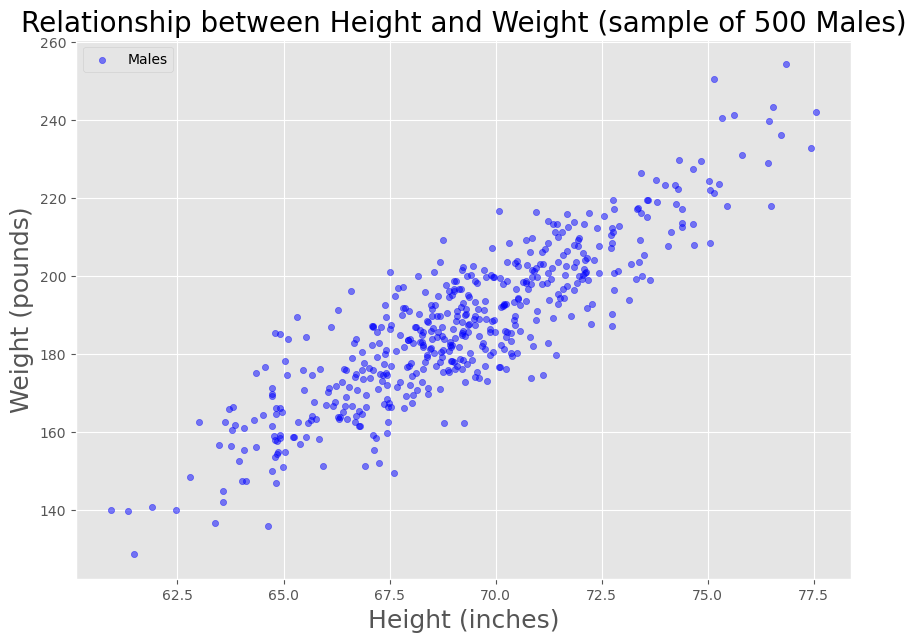

In [25]:
# Scatter plot of 500 males

sample_males = df[df['Gender'] == 'Male'].sample(500)
sample_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males'])
plt.title('Relationship between Height and Weight (sample of 500 Males)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

### Pearson correlation coefficient

Correlation measures the extent to which two variables are related. The Pearson correlation coefficient is used to measure the strength and direction of the linear relationship between two variables. This coefficient is calculated by dividing the covariance of the variables by the product of their standard deviations and has a value between +1 and -1, where 1 is a perfect positive linear correlation, 0 is no linear correlation, and −1 is a perfect negative linear correlation.

In [27]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# correlation coefficients 
df_females['Height'].corr(df_females['Weight'])

0.8496085914086066

In [28]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# correlation coefficients 
df_males['Height'].corr(df_males['Weight'])

0.8629788486152358

In above calculations, we have obtained a Pearson correlation coefficient larger than 0.8, meaning that height and weight are strongly correlated for both males and females.

# Fitting a simple linear model using sklearn

### Linear Model only on the data of Male

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns

In [34]:
df_males = df[df['Gender'] == 'Male']
df_males.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [35]:
df_males.shape

(5000, 3)

In [36]:
X = df_males[['Height']]
y = df_males[['Weight']] 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (4000, 1)
Test feature set size: (1000, 1)
Training variable set size: (4000, 1)
Test variable set size: (1000, 1)


In [39]:
y_test

,Weight
245,156.869952
4493,154.503178
4583,210.964440
2242,183.852038
3407,182.904304
...,...
877,158.916699
1314,191.636714
2344,192.351117
2717,232.718678


In [40]:
# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(X_train, y_train)

LinearRegression()

In [41]:
print("intercept",lr_males.intercept_)

print("coeficient",lr_males.coef_)

intercept [-226.84743593]
coeficient [[5.99492009]]


### Prediction

**Prediction using the lr_males model**

In [42]:
Y_pred = lr_males.predict(X_test)
print ("Type of the predicted object:", type(Y_pred))
print ("Size of the predicted object:", Y_pred.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1000, 1)


In [43]:
Y_pred[0]

array([165.81380607])

**Visualize**

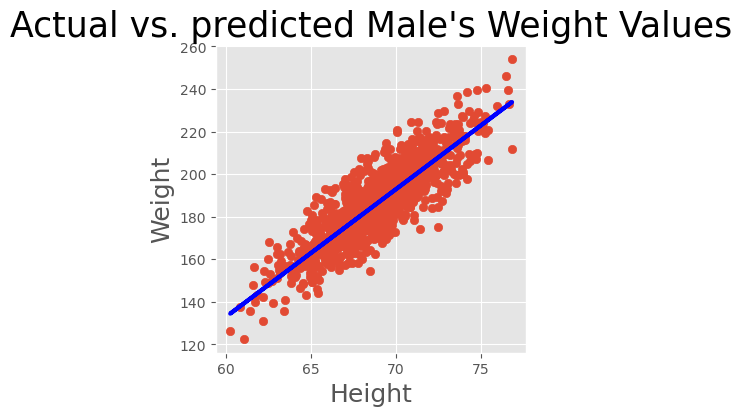

In [44]:
plt.figure(figsize=(4,4))
plt.title("Actual vs. predicted Male's Weight Values",fontsize=25)
plt.xlabel("Height",fontsize=18)
plt.ylabel("Weight", fontsize=18)
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,Y_pred, color='blue', linewidth=3)

The blue line appears to be a good fit to the data. The errors between the scored values and the residuals appear to be minimal. However, an objective evaluation of model performance is require.

**Regression evaluation metrices**

In [45]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,Y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,Y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))

Mean absolute error (MAE): 7.895192621320588
Mean square error (MSE): 98.35736613098732
Root mean square error (RMSE): 9.917528226881299


**R-square value**

In [46]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,Y_pred),3))

R-squared value of predictions: 0.727


$R^2$ is moderately good and fairly close to one, indicating that the model is making useful predictions.

**Cross check first few Actual values and Predicted Values**

In [47]:
df_check = pd.DataFrame({'Actual': y_test['Weight'][:10].values, 'Predicted': Y_pred[:10].ravel()})
df_check

,Actual,Predicted
0,156.869952,165.813806
1,154.503178,166.664184
2,210.964440,206.785973
3,183.852038,186.984844
4,182.904304,193.918143
5,159.319115,167.824650
6,216.923291,201.225617
7,162.429727,152.010714
8,162.690594,150.907139
9,190.185147,188.677913


The residuals of a linear regression model should have an approximately Normal distribution. This condition can be easily tested using graphical methods, specifically a histogram.

**Note:** A common misconception is that the features or label of a linear regression model must have Normal distributions. This is not the case! Rather, the residuals (errors) of the model should be Normally distributed.   

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_20688\3483108420.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids)
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'count')

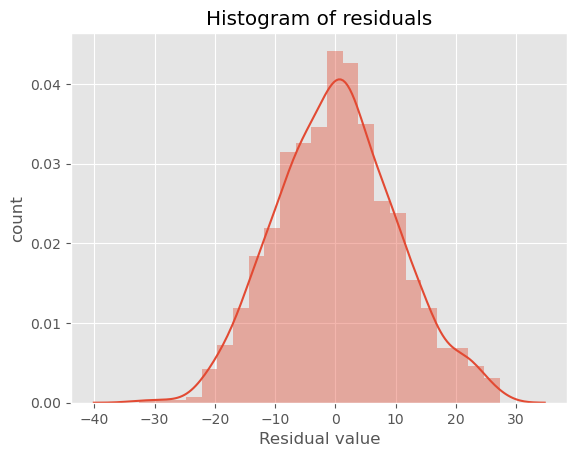

In [48]:
 ## first compute vector of residuals. 
resids = np.subtract(y_test, Y_pred)
## now make the residual plots
sns.distplot(resids)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')

### Making some predictions

In [49]:
height_of_dsbatch_99 = [72,66,73,65,60]
height_of_dsbatch_99_arr = np.array([height_of_dsbatch_99]).reshape(5,1)
height_of_dsbatch_99_arr

array([[72],
       [66],
       [73],
       [65],
       [60]])

In [50]:
Weight_of_dsbatch99 = lr_males.predict(height_of_dsbatch_99_arr)    
Weight_of_dsbatch99

C:\Users\VISHAL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[204.78681086],
       [168.8172903 ],
       [210.78173096],
       [162.8223702 ],
       [132.84776973]])

This histogram and the kernel density plot look approximately Normal, with little deviations. Overall, these residuals look reasonable for a real-world model.  

### Prediction

**Prediction using the lr_females model**

In [53]:
df_females = df[df["Gender"] == 'Female']

In [54]:
df_females.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [55]:
df_females.shape

(5000, 3)

In [56]:
x = df_females[['Height']]
y = df_females[["Weight"]]

In [57]:
x.head()

,Height
5000,58.910732
5001,65.230013
5002,63.369004
5003,64.479997
5004,61.793096


In [58]:
y.head()

,Weight
5000,102.088326
5001,141.305823
5002,131.041403
5003,128.171511
5004,129.781407


In [59]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 10)

In [60]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)


In [61]:
y_train  #just to check

,Weight
7733,139.823868
5447,125.598026
5970,159.490164
5125,137.299169
5798,124.546686
...,...
6180,143.344692
8441,132.315457
6344,138.537010
9623,156.063311


In [62]:
lr_females = LinearRegression()

In [63]:
lr_females.fit(x_train, y_train)

LinearRegression()

In [64]:
print("intercept",lr_females.intercept_)
print("coefficient",lr_females.coef_)

intercept [-243.24665444]
coefficient [[5.95327135]]


In [65]:
y_pred = lr_females.predict(x_test)
print('type of predicted object',type(y_pred))
print(y_pred.shape)

type of predicted object <class 'numpy.ndarray'>
(1000, 1)


In [66]:
import matplotlib.pyplot as plt

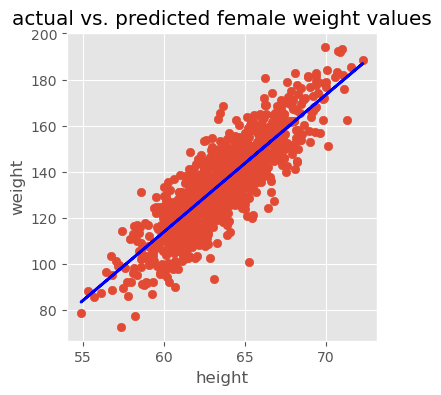

In [67]:
plt.figure(figsize = (4,4))
plt.title('actual vs. predicted female weight values')
plt.xlabel('height')
plt.ylabel('weight')
plt.scatter(x = x_test, y = y_test)
plt.plot(x_test,y_pred, color = 'blue',linewidth = 2)

In [68]:
print("MAE :", metrics.mean_absolute_error(y_test,y_pred))
print("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE : 8.310314199763761
MSE : 106.36169843291769
RMSE : 10.313180810638283


In [69]:
print("R-squared value of prediction",(metrics.r2_score(y_test,y_pred)))

R-squared value of prediction 0.7308237164583704


In [70]:
df_check= pd.DataFrame({'Actual' : y_test['Weight'][:20].values, 'Predicted' : y_pred[:20].ravel()})
df_check

,Actual,Predicted
0,150.253650,145.483322
1,162.196323,160.288582
2,139.321143,143.851959
3,139.194289,127.660408
4,134.529192,143.795271
5,110.490718,117.333964
6,143.042567,150.962989
7,144.875398,130.576851
8,111.232281,113.651449
9,135.601006,133.104205


In [71]:
resids = np.subtract(y_test,y_pred)
resids[:5]

,Weight
5245,4.770329
9493,1.907741
9583,-4.530816
7242,11.533881
8407,-9.266078


C:\Users\VISHAL\AppData\Local\Temp\ipykernel_20688\2421561513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids)
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'count')

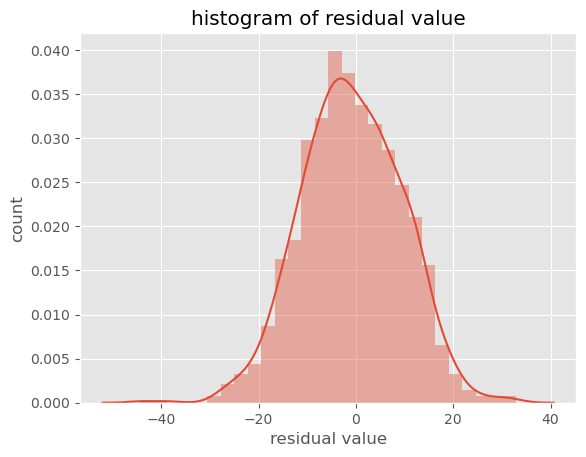

In [72]:
sns.distplot(resids)
plt.title('histogram of residual value')
plt.xlabel('residual value')
plt.ylabel('count')

### MAKING FEW PREDICTIONS USING OUR MODEL

In [76]:
height_females = [65,60,62,63,68]
arr = np.array([height_females]).reshape(5,1)
arr

array([[65],
       [60],
       [62],
       [63],
       [68]])

In [77]:
weight_females = lr_females.predict(arr)
weight_females

C:\Users\VISHAL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[143.71598302],
       [113.9496263 ],
       [125.85616899],
       [131.80944033],
       [161.57579706]])

In [78]:
new_arr = np.concatenate((arr,weight_females), axis = 1)
new_arr

array([[ 65.        , 143.71598302],
       [ 60.        , 113.9496263 ],
       [ 62.        , 125.85616899],
       [ 63.        , 131.80944033],
       [ 68.        , 161.57579706]])